In [8]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
img = cv2.imread('./sharapova1.jpg')
img.shape

(555, 700, 3)

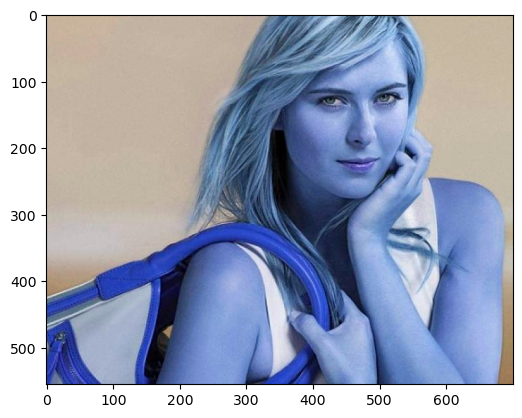

In [10]:
plt.imshow(img)


In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [12]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

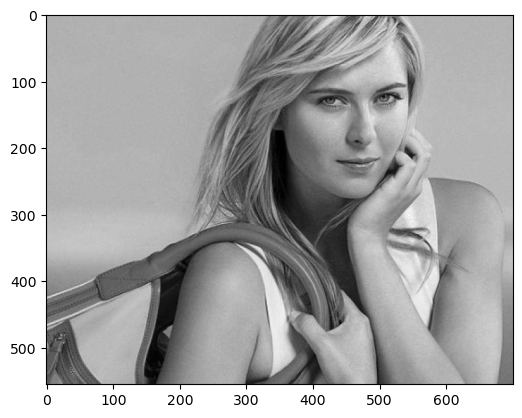

In [13]:
plt.imshow(gray, cmap='gray')


In [14]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

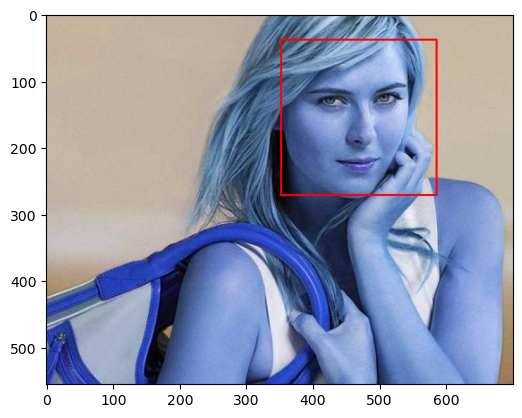

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

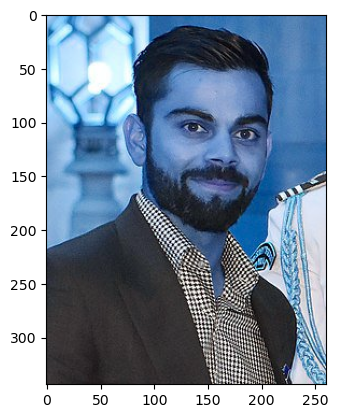

In [25]:
img2 = cv2.imread('./v.jpg')
plt.imshow(img2)

In [27]:
faces2 = face_cascade.detectMultiScale(img2, 1.3, 5)
faces2

array([[ 85,  50, 145, 145]])

In [28]:
(x,y,w,h) = faces2[0]
x,y,w,h

(85, 50, 145, 145)

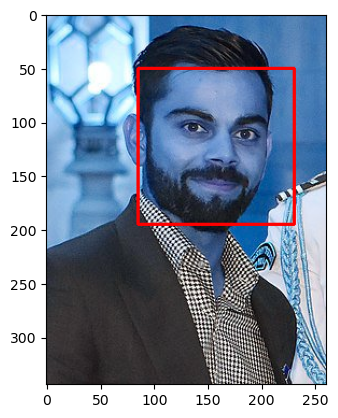

In [29]:
face_img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img2)

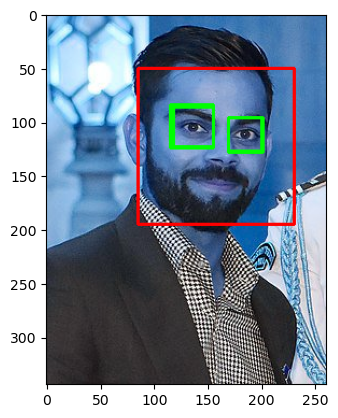

In [34]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces2:
    face_img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img2[y:y+h, x:x+w]
    roi_color2 = face_img2[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color2,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img2, cmap='gray')
plt.show()

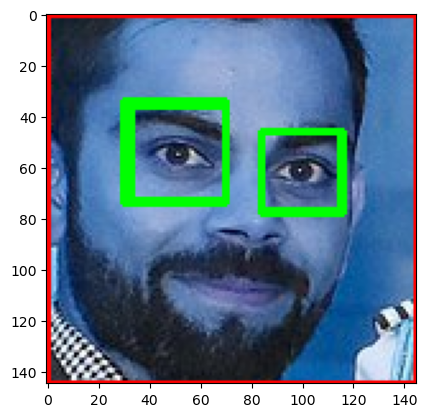

In [35]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

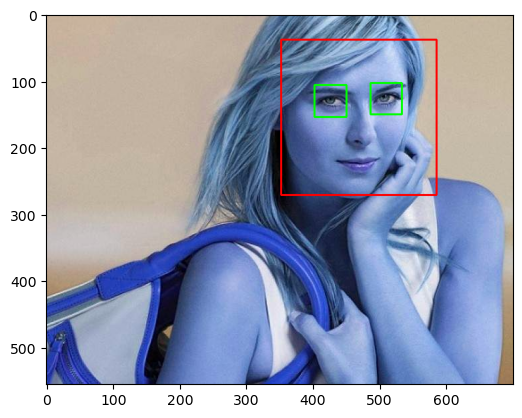

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

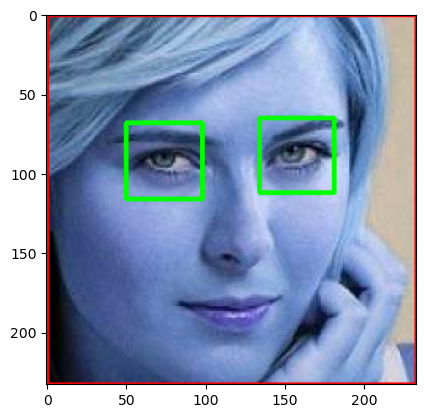

In [24]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [25]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

In [37]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

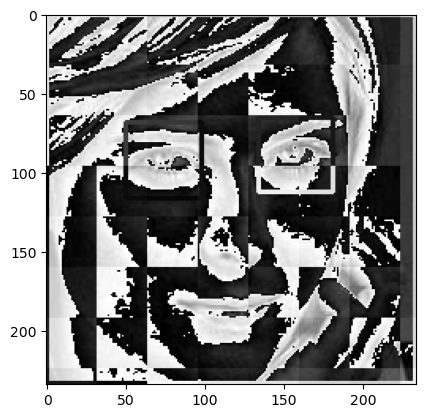

In [27]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [39]:
cropped_img = np.array(roi_color2)
cropped_img.shape

(145, 145, 3)

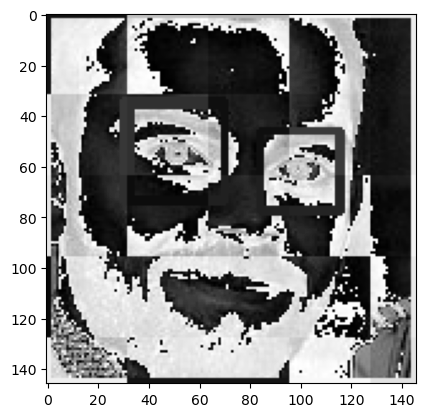

In [40]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [56]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

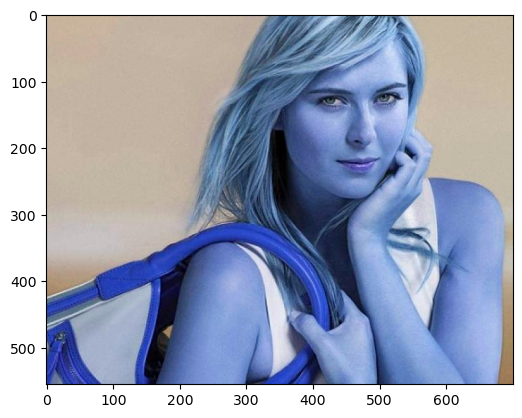

In [57]:
original_image = cv2.imread('./sharapova1.jpg')
plt.imshow(original_image)

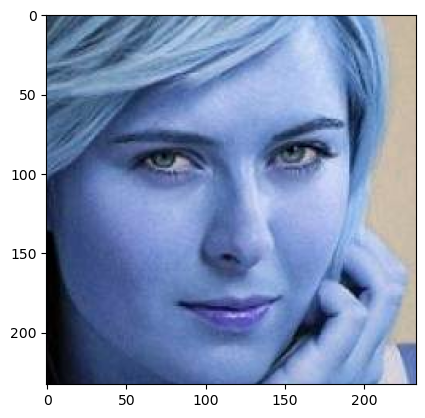

In [58]:
cropped_image = get_cropped_image_if_2_eyes('./sharapova1.jpg')
plt.imshow(cropped_image)

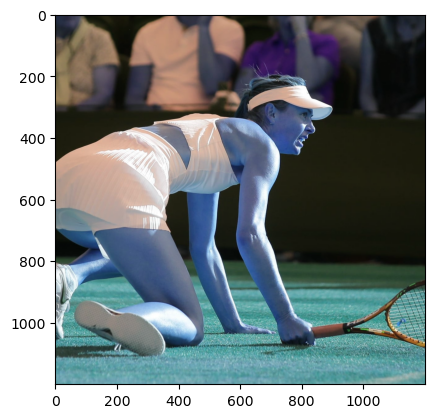

In [59]:
org_image_obstructed = cv2.imread('./sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [60]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./sharapova2.jpg')
cropped_image_no_2_eyes

In [61]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [62]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [63]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/pv_sindhu',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [64]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [65]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/pv_sindhu
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [66]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [67]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'pv_sindhu': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [68]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [69]:
len(X[0])

4096

In [70]:
32*32*3 + 32*32

4096

In [71]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [72]:
y[0]

0

In [73]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(249, 4096)

In [74]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8412698412698413

In [364]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.78      1.00      0.88         7
           2       0.74      0.82      0.78        17
           3       0.92      0.69      0.79        16
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00        10

    accuracy                           0.84        63
   macro avg       0.86      0.87      0.86        63
weighted avg       0.86      0.84      0.84        63



In [365]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

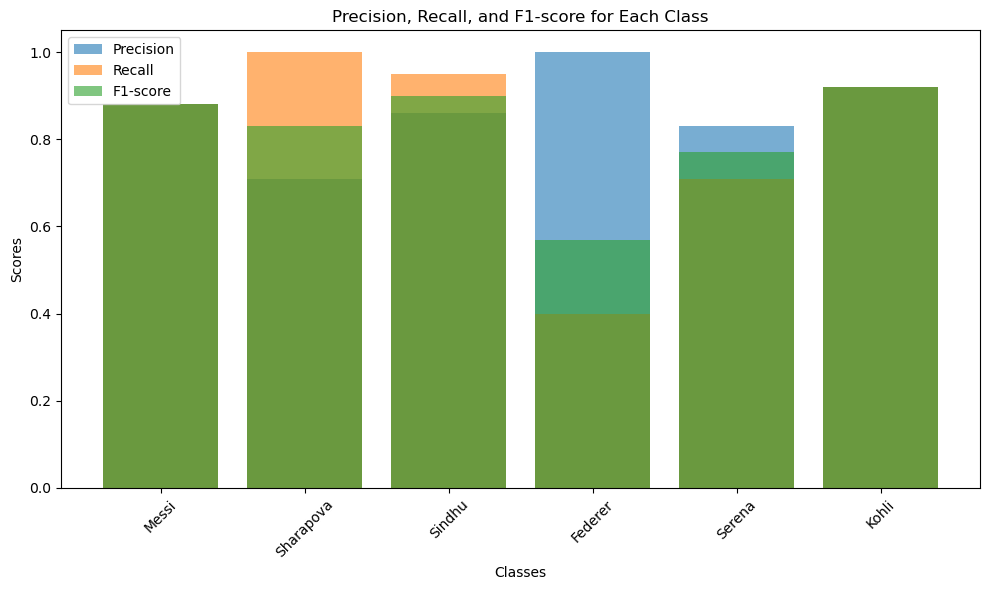

In [366]:
import matplotlib.pyplot as plt

# Replace these values with the metrics from your classification report
precision = [0.88, 0.71, 0.86, 1.00, 0.83, 0.92]
recall = [0.88, 1.00, 0.95, 0.40, 0.71, 0.92]
f1_score = [0.88, 0.83, 0.90, 0.57, 0.77, 0.92]
class_labels = ['Messi', 'Sharapova', 'Sindhu', 'Federer', 'Serena', 'Kohli']

# Plotting bar charts for precision, recall, and F1-score
plt.figure(figsize=(10, 6))

plt.bar(class_labels, precision, alpha=0.6, label='Precision')
plt.bar(class_labels, recall, alpha=0.6, label='Recall')
plt.bar(class_labels, f1_score, alpha=0.6, label='F1-score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [367]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [368]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.822475,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.629018,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.795875,{'logisticregression__C': 10}


In [369]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [370]:
best_estimators['svm'].score(X_test,y_test)

0.8412698412698413

In [371]:
best_estimators['random_forest'].score(X_test,y_test)

0.6825396825396826

In [372]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7777777777777778

In [373]:
best_clf = best_estimators['svm']

In [374]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  1,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  3, 12,  1,  1,  0],
       [ 1,  1,  0, 12,  2,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

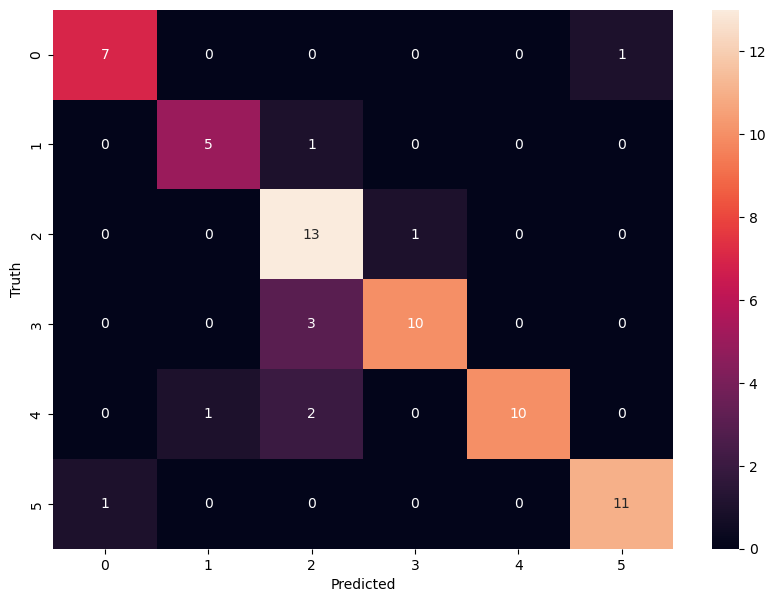

In [331]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [332]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'pv_sindhu': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [76]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model2.pkl')


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model2.pkl']

In [77]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))